In [129]:
# Data manipulation
import numpy as np
import pandas as pd

# Ploting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Scientific computing
import scipy as sp

# Machine Learning
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import f1_score
import random
import datetime as dt
from sklearn import tree
import pickle
import seaborn as sns

In [116]:
# load the model from disk
lda_model = pickle.load(open('models/lda_model.sav', 'rb'))
log_model = pickle.load(open('models/log_model.sav', 'rb'))
qda_model = pickle.load(open('models/qda_model.sav', 'rb'))
tree_model = pickle.load(open('models/tree.fit.sav', 'rb'))
ada_model = pickle.load(open('models/ada_fit.sav', 'rb'))
forest_model = pickle.load(open('models/rf_model.sav', 'rb'))

In [3]:
df = pd.read_csv('data/x_60_days.csv')

In [5]:
df.head()

,Unnamed: 0,reinspection,recent_inspection,task_force,special_event,canvass,closeup,liquor,fire,no_entry,...,license_status_AAI,license_status_Missing,license_status_REV,inspection_weekday_Friday,inspection_weekday_Monday,inspection_weekday_Saturday,inspection_weekday_Sunday,inspection_weekday_Thursday,inspection_weekday_Tuesday,inspection_weekday_Wednesday
0,1852,0,0,0,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1881,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1882,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1883,0,0,0,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1853,1,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
x = df.ix[:, df.columns != 'Unnamed: 0']

In [11]:
x.head()

,reinspection,recent_inspection,task_force,special_event,canvass,closeup,liquor,fire,no_entry,complaint,...,license_status_AAI,license_status_Missing,license_status_REV,inspection_weekday_Friday,inspection_weekday_Monday,inspection_weekday_Saturday,inspection_weekday_Sunday,inspection_weekday_Thursday,inspection_weekday_Tuesday,inspection_weekday_Wednesday
0,0,0,0,0,1,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,1,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [117]:
lda_yhat = pd.DataFrame(lda_model.predict_proba(x))
lda_yhat["id"] = df.ix[:, df.columns == 'Unnamed: 0']
lda_yhat.columns=['prob_0', 'prob_1', 'id']

log_yhat = pd.DataFrame(log_model.predict_proba(x))
log_yhat["id"] = df.ix[:, df.columns == 'Unnamed: 0']
log_yhat.columns=['prob_0', 'prob_1', 'id']

qda_yhat = pd.DataFrame(qda_model.predict_proba(x))
qda_yhat["id"] = df.ix[:, df.columns == 'Unnamed: 0']
qda_yhat.columns=['prob_0', 'prob_1', 'id']

ada_yhat = pd.DataFrame(ada_model.predict_proba(x))
ada_yhat["id"] = df.ix[:, df.columns == 'Unnamed: 0']
ada_yhat.columns=['prob_0', 'prob_1', 'id']

tree_yhat = pd.DataFrame(tree_model.predict_proba(x))
tree_yhat["id"] = df.ix[:, df.columns == 'Unnamed: 0']
tree_yhat.columns=['prob_0', 'prob_1', 'id']

forest_yhat = pd.DataFrame(forest_model.predict_proba(x))
forest_yhat["id"] = df.ix[:, df.columns == 'Unnamed: 0']
forest_yhat.columns=['prob_0', 'prob_1', 'id']

In [118]:
#this will sort by proba 0, then assign in order by max per day inspections
#the average in the actual set was 30/day. We'll go with that as capacity.
def assign(df1):
    capacity = 30
    df_sorted = df1.sort(['prob_0'], ascending=[0])
    
    dates = []

    for o in range(736208,736269): #ordinals for 9/1 to 10/31
        dates.append(dt.date.fromordinal(o))
    
    j=0
    k=0
    for i,item in df_sorted.iterrows():
        #print i, item
        #item["inspection_dt"] = dates[k]
        #y_hat.loc[y_hat.iloc[i], 'inspection_dt'] = dates[k]
        df_sorted.ix[i, "assigned_dt"] = dates[k]
    
        j = j+1
    
        if j > 30: #max allowed per day
            j = 1 #reset the counter

            if k < len(dates) - 1:
                k = k + 1 #move to next day
    
    df_sorted["assigned_dt"] = df_sorted["assigned_dt"].astype('datetime64[ns]')
    return df_sorted

In [120]:
lda_yhat_assigned = assign(lda_yhat)
log_yhat_assigned = assign(log_yhat)
qda_yhat_assigned = assign(qda_yhat)
ada_yhat_assigned = assign(ada_yhat)
tree_yhat_assigned = assign(tree_yhat)
forest_yhat_assigned = assign(forest_yhat)

/Users/angelo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [99]:
#build null model
df_actual = pd.read_csv('data/y_60_days.csv')
#df_actual.inspection_dt = df_actual.inspection_dt.astype('datetime64[ns]')
#last2_df = df_actual[((df_actual.inspection_dt.dt.month==9) | (df_actual.inspection_dt.dt.month==10)) & (df_actual.inspection_dt.dt.year==2016)]

#last2_df = df_actual[df["id"] == ]

y = pd.DataFrame()
y["id"] = df_actual["Unnamed: 0"]
y["y"] = df_actual["y"]
y["assigned_dt"] = df_actual["inspection_date_string"].astype('datetime64[ns]')

In [101]:
def score_delta_days(predicted, actual):
    #iterate each actual
    deltas = []
    
    actual_fails = actual[actual["y"] == 0]
    
    for i,item in actual_fails.iterrows(): 
        #find the corresponding predicted and calculate a date delta for fails only
        predicted_dt = predicted[predicted.index == item.name]["assigned_dt"]
        diff = (item.assigned_dt - predicted_dt).dt.days
        diff = diff.reset_index()
        deltas.append(diff["assigned_dt"].astype('int'))
    #avg them
    s = np.mean(deltas)
    return s
    
#score(y_hat, y)

In [121]:
#compare with nullmodel
#lda_yhat_assigned = lda_yhat_assigned.set_index(['id'])
lda_score1 = score_delta_days(lda_yhat_assigned, y)
qda_score1 = score_delta_days(qda_yhat_assigned, y)
log_score1 = score_delta_days(log_yhat_assigned, y)
ada_score1 = score_delta_days(ada_yhat_assigned, y)
tree_score1 = score_delta_days(tree_yhat_assigned, y)
forest_score1 = score_delta_days(forest_yhat_assigned, y)

In [122]:
print "Number of days failures caught earlier (on average) than current process."
print "LDA %.2f, QDA %.2f, LOG %.2f, ADA %.2f, TREE %.2f, Forest %.2f" % (lda_score1, qda_score1, log_score1, ada_score1, tree_score1, forest_score1)

Number of days failures caught earlier (on average) than current process.
LDA 9.05, QDA 9.27, LOG 9.87, ADA 15.03, TREE 3.57, Forest 14.34


In [88]:
#Another way to measure is the proportion of actual 
#failures caught in the first 30 days
def score_prop_first(predicted, actual):
    actual_fails = actual[actual["y"] == 0]
    
    predicted_first_month = predicted[predicted.assigned_dt.dt.month == 9]
    
    overlap = actual_fails[actual_fails["id"].isin(predicted_first_month["id"])]["id"].count()

    return overlap/float(actual_fails.shape[0])

In [123]:
lda_score2 = score_prop_first(lda_yhat_assigned, y)
qda_score2 = score_prop_first(qda_yhat_assigned, y)
log_score2 = score_prop_first(log_yhat_assigned, y)
ada_score2 = score_prop_first(ada_yhat_assigned, y)
tree_score2 = score_prop_first(tree_yhat_assigned, y)
forest_score2 = score_prop_first(forest_yhat_assigned, y)

In [124]:
print "Proportion Caught in the first 1/2 of the inspection cycle"
print "LDA %.2f, QDA %.2f, LOG %.2f, ADA %.2f, TREE %.2f, Forest %.2f" % (lda_score2, qda_score2, log_score2, ada_score2, tree_score2, forest_score2)

Proportion Caught in the first 1/2 of the inspection cycle
LDA 0.88, QDA 0.89, LOG 0.89, ADA 0.89, TREE 0.64, Forest 0.90


<Container object of 6 artists>

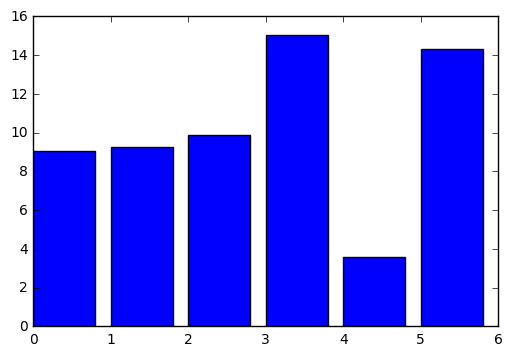

In [127]:

plt.bar(np.arange(6),[lda_score1, qda_score1, log_score1, ada_score1, tree_score1, forest_score1])

In [138]:
df_score1 = pd.DataFrame()
df_score1["Scores"] = [lda_score1, qda_score1, log_score1, ada_score1, tree_score1, forest_score1]
df_score1["Models"] = ['LDA', 'QDA', 'Logistic Regression', 'ADA Boost', 'Single Tree', 'Random Forest']

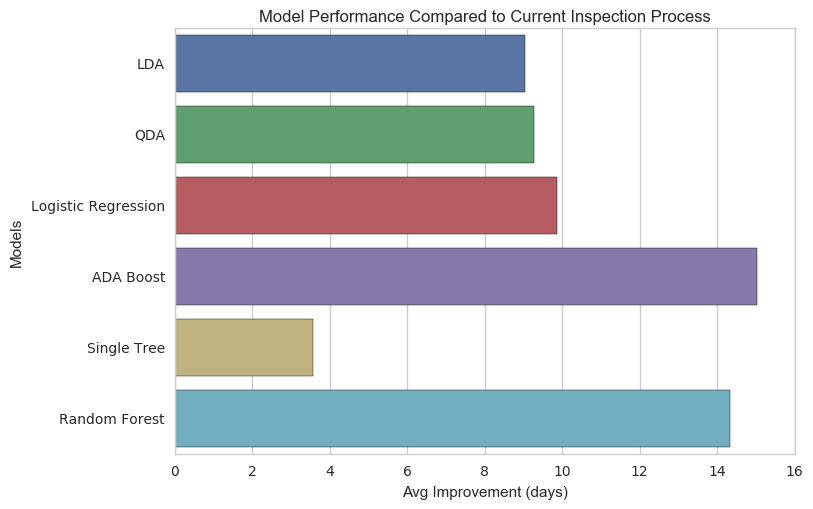

In [140]:
sns.set_style("whitegrid")
ax = sns.barplot(x="Scores", y="Models", data=df_score1)
ax.set(xlabel="Avg Improvement (days)", ylabel="Models")
ax.set_title("Model Performance Compared to Current Inspection Process")

In [141]:
df_score2 = pd.DataFrame()
df_score2["Scores"] = [lda_score2, qda_score2, log_score2, ada_score2, tree_score2, forest_score2]
df_score2["Models"] = ['LDA', 'QDA', 'Logistic Regression', 'ADA Boost', 'Single Tree', 'Random Forest']

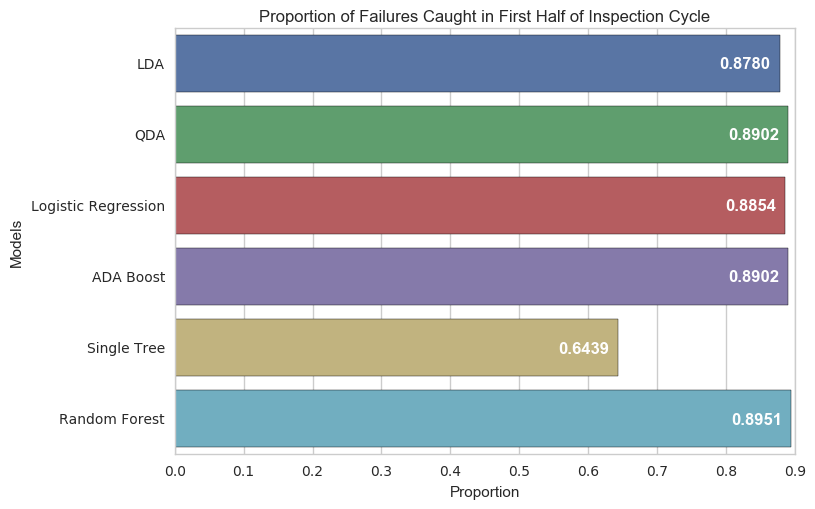

In [159]:
sns.set_style("whitegrid")
ax = sns.barplot(x="Scores", y="Models", data=df_score2)
ax.set(xlabel="Proportion", ylabel="Models")
ax.set_title("Proportion of Failures Caught in First Half of Inspection Cycle")

for n, (_x, label) in enumerate(zip(df_score2["Scores"], df_score2["Models"])):
    ax.annotate(
        s='{:.4f}'.format(abs(_x)),
        xy=(_x - .05, n + .2),
        ha='center',va='center',
        xytext=(0,10),
        color='white',
        textcoords='offset points',
        weight='bold'
    )